In [4]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('./train_data.CSV')
df_test = pd.read_csv('./test_data.CSV')
x_train = df_train[['Z1','Z2','r1','r2','R1','R2','N1','N2','EP1','EP2','EA1','EA2','IE1','IE2']]
y_train = df_train['△G*o']
x_test = df_test[['Z1','Z2','r1','r2','R1','R2','N1','N2','EP1','EP2','EA1','EA2','IE1','IE2']]
y_test = df_test['△G*o']

kf = KFold(n_splits=10,shuffle = True,random_state=10)
clf = AdaBoostRegressor()
n_estimators = [30,40,60,80,100,200,300,400,500,600]
learning_rate = [0.05,0.08,0.1,0.15,0.2,0.3,0.5,0.7]
random_state = [0,5,10,15,20,30]
param_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate,'random_state':random_state}
clf_best = GridSearchCV(clf,param_grid,cv=kf,scoring='neg_mean_squared_error')                                    
clf_best.fit(x_train,y_train)

y_train_pred=clf_best.predict(x_train)
y_test_pred=clf_best.predict(x_test)
train_score_mse = mean_squared_error(y_train,y_train_pred)
test_score_mse = mean_squared_error(y_test,y_test_pred)
train_score_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
test_score_rmse  =  np.sqrt(mean_squared_error(y_test,y_test_pred))
train_score_mae = mean_absolute_error(y_train,y_train_pred)
test_score_mae = mean_absolute_error(y_test,y_test_pred)
train_r2_score = r2_score(y_train,y_train_pred)
test_r2_score = r2_score(y_test,y_test_pred)
print('MSE',train_score_mse,test_score_mse)
print('RMSE',train_score_rmse,test_score_rmse)
print('MAE',train_score_mae,test_score_mae)
print('R2',train_r2_score,test_r2_score)
print("best_params：",clf_best.best_params_)

MSE 0.24725545732031903 1.084139374493109
RMSE 0.49724788317329116 1.0412201373835932
MAE 0.4295312792687834 0.6537091564621315
R2 0.9660378543038879 0.8994901013566703
best_params： {'learning_rate': 0.5, 'n_estimators': 80, 'random_state': 5}


meta NOT subset; don't know how to subset; dropped


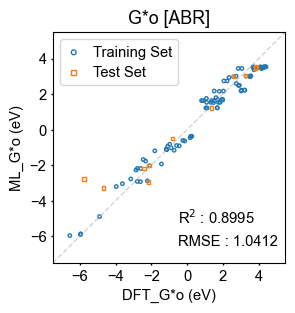

In [7]:
from matplotlib.pyplot import MultipleLocator
font={'family':"Arial",'size':'10.667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize = (3, 3))

ax.scatter(y_train, y_train_pred, label="Training Set",alpha=1, marker='o', s=6, facecolor='none', color='#1f77b4')
ax.scatter(y_test, y_test_pred, label='Test Set',alpha=1, marker='s', s=6, facecolor='none', color='#ff7f0e')
ax.tick_params(axis='both', labelcolor='black', width=1, length=1.1, color='black', which='major')
#ax.tick_params(axis='both', labelcolor='black', width=1, length=2, color='black', which='minor')
#ax.xaxis.set_minor_locator(MultipleLocator(1))
y_major_locator=MultipleLocator(2)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(2)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xlim(xmin= -7.5,xmax = 5.5)
ax.set_ylim(ymin= -7.5,ymax = 5.5)
line=ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='#A9A9A9',alpha=0.5)
plt.setp(line, linewidth=1) 
plt.title('G*o [ABR]')
plt.xticks(fontsize=10.667)
plt.yticks(fontsize=10.667)
plt.xlabel('DFT_G*o (eV)')
plt.ylabel('ML_G*o (eV)')
plt.legend(markerscale=1.4,frameon=True,fontsize=10.667,labelspacing=0.4,handlelength=1)
plt.text(-0.5,-6.5,'R$^2$ : 0.8995\nRMSE : 1.0412',fontsize=10.667,linespacing=1.7)
#plt.savefig('gbr_go.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('gbr_go.png',dpi=600, bbox_inches = "tight")
plt.savefig('ABR_go.pdf',dpi=600, bbox_inches = "tight")
plt.show()

In [5]:
import joblib
joblib.dump(clf_best.best_estimator_, './abr.pkl')

['./abr.pkl']